In [1]:
#跨平台量化环境测试+RQ+TU+QA+Funcat+Hikyuu+Abu+DevilYuan+Kivy+tensorflow

In [1]:
#时间统一设定
import time
import datetime
i = datetime.datetime.now()#当前日期
print ("读取当日时间格式 i=",i) #当日时间格式：yyyy-mm-dd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=600) #倒推300天！！！
    yesterday=today-oneday  
    return yesterday
run_start_date = (getYesterday())#开始时间
print ("设定起始日 run_start_date=",run_start_date) #当日时间格式：yyyy-mm-dd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=1) #周二到周六设置前一天数据，周日设定前两天，周一设置前三天！！！
    yesterday=today-oneday  
    return yesterday
run_end_date = (getYesterday())# 输出前N天日期
print ("设定结束日 run_end_date=",run_end_date) #当日时间格式：yyyy-mm-dd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=5) #10天
    yesterday=today-oneday  
    return yesterday
open_start_date = (getYesterday())# 输出前N天日期
print ("设定选股起始日 open_start_date=",open_start_date) #当日时间格式：yyyy-mm-dd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=0) 
    yesterday=today-oneday  
    return yesterday
open_end_date = (getYesterday())## 20yymmdd格式，输出当日日期
#open_end_date = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("设定选股结束日 open_end_date=",open_end_date) #当日时间格式：yyyy-mm-dd

读取当日时间格式 i= 2019-01-12 04:17:13.410059
设定起始日 run_start_date= 2017-05-22
设定结束日 run_end_date= 2019-01-11
设定选股起始日 open_start_date= 2019-01-07
设定选股结束日 open_end_date= 2019-01-12


In [2]:
%load_ext rqalpha 

In [3]:
%%rqalpha -h
""

Usage: ipykernel_launcher.py [OPTIONS]

  Start to run a strategy

Options:
  -h, --help                      Show this message and exit.
  -d, --data-bundle-path PATH
  -f, --strategy-file PATH
  -s, --start-date DATE
  -e, --end-date DATE
  -bm, --benchmark TEXT
  -mm, --margin-multiplier FLOAT
  -a, --account TEXT...           set account type with starting cash
  --position TEXT                 set init position
  -fq, --frequency [1d|1m|tick]
  -rt, --run-type [b|p|r]
  -rp, --round-price
  -mk, --market [cn|hk]
  --resume
  --source-code TEXT
  -l, --log-level [verbose|debug|info|error|none]
  --disable-user-system-log       disable user system log stdout
  --disable-user-log              disable user log stdout
  --logger TEXT...                config logger, e.g. --logger system_log
                                  debug
  --locale [cn|en]
  --extra-vars TEXT               override context vars
  --enable-profiler               add line profiler to profile your strategy
  --co

2018-01-03 WARN 订单创建失败: 下单量为 0
2018-01-04 WARN 订单创建失败: 下单量为 0
2018-01-05 WARN 订单创建失败: 下单量为 0
2018-01-08 WARN 订单创建失败: 下单量为 0
2018-01-09 WARN 订单创建失败: 下单量为 0
2018-01-10 INFO positions hs300: 0, zz500: 3, gz: 0
2018-01-11 WARN 订单创建失败: 下单量为 0
2018-01-11 INFO positions hs300: 11, zz500: 0, gz: 0
2018-01-12 WARN 订单创建失败: 下单量为 0
2018-01-12 INFO positions hs300: 11, zz500: 0, gz: 0
2018-01-15 WARN 订单创建失败: 下单量为 0
2018-01-15 INFO positions hs300: 11, zz500: 0, gz: 0
2018-01-16 WARN 订单创建失败: 下单量为 0
2018-01-16 INFO positions hs300: 11, zz500: 0, gz: 0
2018-01-17 WARN 订单创建失败: 下单量为 0
2018-01-17 INFO positions hs300: 11, zz500: 0, gz: 0
2018-01-18 WARN 订单创建失败: 下单量为 0
2018-01-18 INFO positions hs300: 11, zz500: 0, gz: 0
2018-01-19 WARN 订单创建失败: 下单量为 0
2018-01-19 INFO positions hs300: 11, zz500: 0, gz: 0
2018-01-22 WARN 订单创建失败: 下单量为 0
2018-01-22 INFO positions hs300: 11, zz500: 0, gz: 0
2018-01-23 WARN 订单创建失败: 下单量为 0
2018-01-23 INFO positions hs300: 11, zz500: 0, gz: 0
2018-01-24 WARN 订单创建失败: 下单量为 0
2018-0

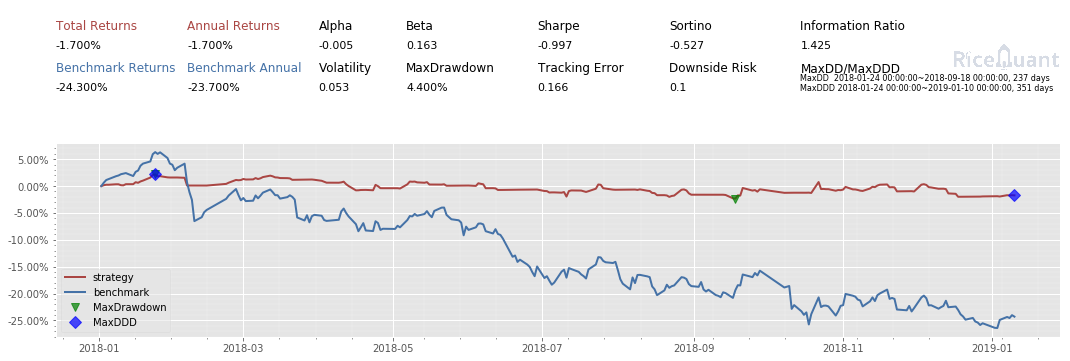

In [5]:
%%rqalpha -s 20180101 -e 20190110 -p -bm 000001.XSHG --account stock 100000
#RQALPHA回测测试
def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 5, '1d', 'close')
    zz_history20 = history_bars(zz, 7, '1d', 'close')    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 0.3)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 0.2)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 0.5)
        logger.info("positions hs300: " + str(hsQuality) + ", zz500: " + str(zzQuality) + ", gz: " + str(gzQuality))

2017-05-26 WARN 订单创建失败: 下单量为 0
2017-05-31 WARN 订单创建失败: 下单量为 0
2017-06-01 WARN 订单创建失败: 下单量为 0
2017-06-06 WARN 订单创建失败: 下单量为 0
2017-06-09 WARN 订单创建失败: 下单量为 0
2017-06-12 WARN 订单创建失败: 下单量为 0
2017-06-13 WARN 订单创建失败: 下单量为 0
2017-06-14 WARN 订单创建失败: 下单量为 0
2017-06-15 WARN 订单创建失败: 下单量为 0
2017-06-16 WARN 订单创建失败: 下单量为 0
2017-06-19 WARN 订单创建失败: 下单量为 0
2017-06-20 WARN 订单创建失败: 下单量为 0
2017-06-21 WARN 订单创建失败: 下单量为 0
2017-06-23 WARN 订单创建失败: 下单量为 0
2017-06-26 WARN 订单创建失败: 下单量为 0
2017-06-30 WARN 订单创建失败: 下单量为 0
2017-07-03 WARN 订单创建失败: 下单量为 0
2017-07-04 WARN 订单创建失败: 下单量为 0
2017-07-05 WARN 订单创建失败: 下单量为 0
2017-07-06 WARN 订单创建失败: 下单量为 0
2017-07-07 WARN 订单创建失败: 下单量为 0
2017-07-10 WARN 订单创建失败: 下单量为 0
2017-07-12 WARN 订单创建失败: 下单量为 0
2017-07-13 WARN 订单创建失败: 下单量为 0
2017-07-14 WARN 订单创建失败: 下单量为 0
2017-07-18 WARN 订单创建失败: 下单量为 0
2017-07-19 WARN 订单创建失败: 下单量为 0
2017-07-21 WARN 订单创建失败: 下单量为 0
2017-07-24 WARN 订单创建失败: 下单量为 0
2017-07-26 WARN 订单创建失败: 下单量为 0
2017-07-27 WARN 订单创建失败: 下单量为 0
2017-07-28 WARN 订单创建失败: 下单量为 0
2017-07-

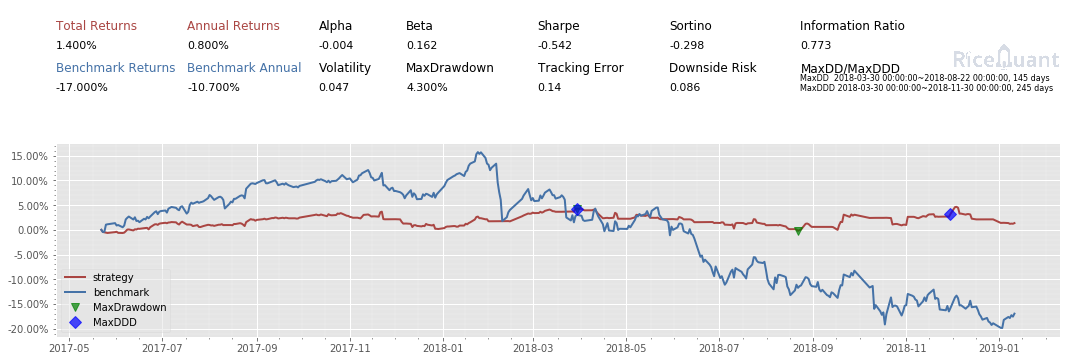

In [6]:
#funcat回测运行测试
config = {
  "base": {
    "start_date": run_start_date,
    "end_date": run_end_date,
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}
from rqalpha.api import *
from rqalpha import run_func
def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 5, '1d', 'low')
    zz_history20 = history_bars(zz, 7, '1d', 'low')    
    hsIncrease = hs_history20[-1] - hs_history20[1]
    zzIncrease = zz_history20[-1] - zz_history20[0] 
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 0.3)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 0.2)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 0.5)       
results = run_func(init=init, handle_bar=handle_bar, config=config)        

《开始时间：==》 2019-01-12T04:18:25.953975
设定股票代码 000001.XSHG
打印 开盘 最高 最低 收盘 成交量 2539.55 2554.79 2533.36 2553.83 149444100.0
当天涨幅 0.007388268707348766
打印60日均线 2588.313166666664
判断收盘价是否大于60日均线 False
30日最高价 2666.08
最近30日，收盘价 Close 大于60日均线的天数 3
10日均线上穿 False
最近10天收阳线的天数 6
最近60天K线实体的最高价 2703.51
5日均线上穿10日均线 False
均线 2539.55 2553.83 2554.79 2533.36 149444100.0


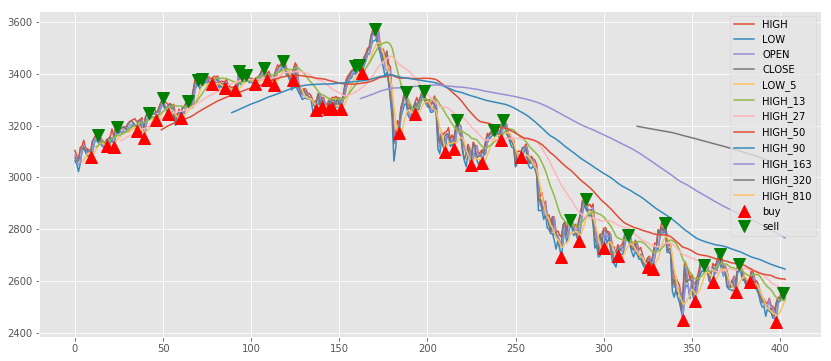

布林带 2537.881363636361 2633.0825642847026 2451.5113676409246


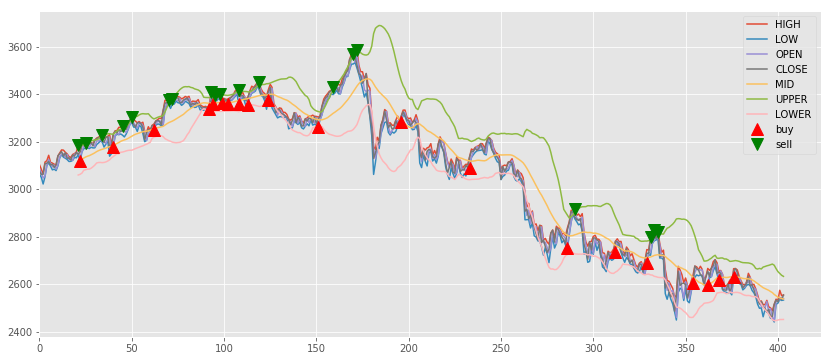

成交市值关系+KDJ显示图及买卖 381798292239.0 378595705176.0 68631440760.08948 38.210313727041196 35.40957449235107 43.81179219642145


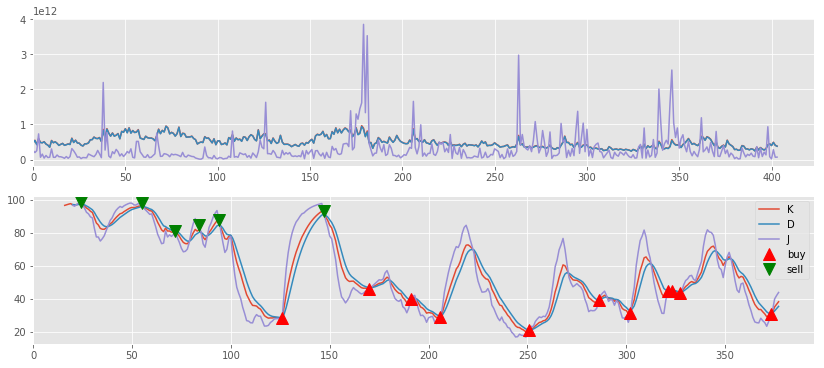

成交量+DMA指标+买卖 -78.43320000000176 -84.42708000000144


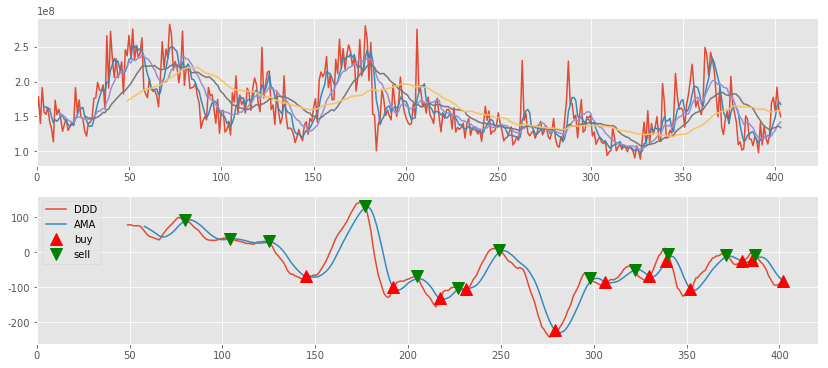

BOLL 2553.841574074078 2665.5969164702174 2451.334705746254


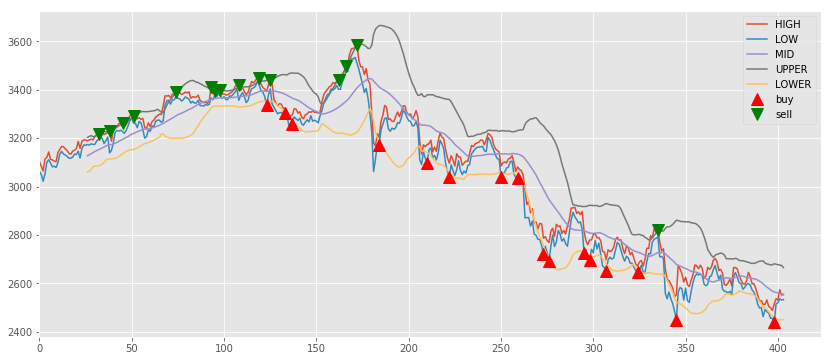

带量BOLL 58495.64934887016 58990.47115293523 58846.685436396205 58517.63821397666 52329.43256567254 68676.11221957437 36314.149929219966


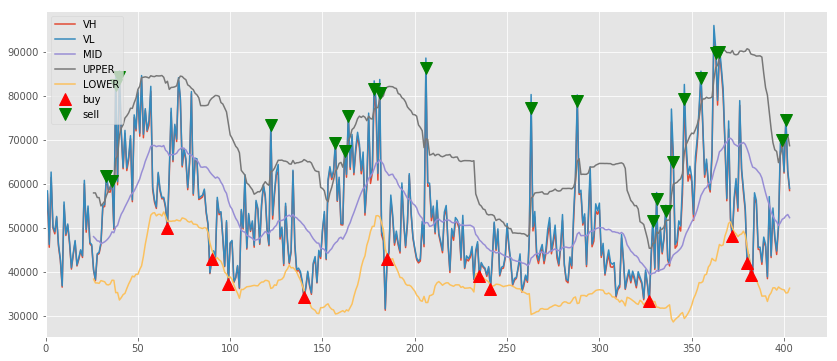

成交量均线+VC 26.889258176430594 112.65026008656537 59.08062267362045


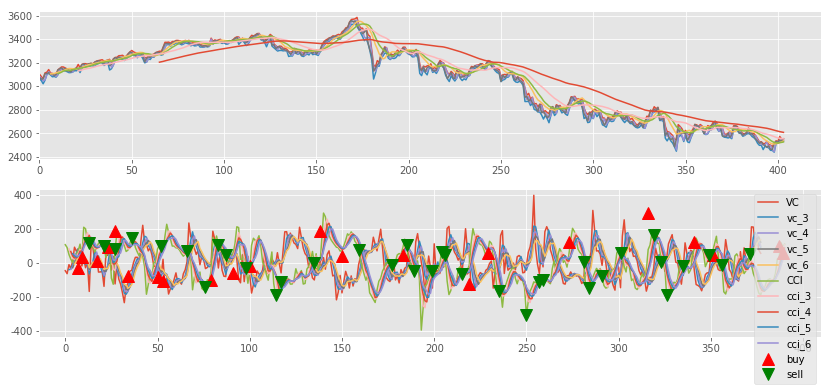

《结束时间：==》 2019-01-12T04:18:37.848227


In [7]:
#Tushare 数据在线测试作图参考
print ("《开始时间：==》",("%s" % datetime.datetime.now().isoformat() )) 
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)
#扩展MOD
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
#读取/设定数据库时间区域，当前股票，选股时间段。 
x1="000001.XSHG"#XSHG指数，XSHE股票
print ("设定股票代码",x1)
#设定数据库连接：RQALPHA/TUSHARE
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "TU"#热情啊老婆哈为本地数据，如果修改tushare改tushare在线数据连接
if backend == "RQ":
    set_data_backend(RQAlphaDataBackend())
elif backend == "TU":
    set_data_backend(TushareDataBackend())
set_start_date(run_start_date)
#当前股票最新数据显示test。
S(x1)  # 设置当前关注股票
T(run_end_date)   # 设置当前观察日期
#测试数据库
print ("打印 开盘 最高 最低 收盘 成交量",OPEN, HIGH, LOW, CLOSE, VOL)  # 打印 Open High Low Close
print ("当天涨幅",CLOSE / CLOSE[1] - 1)  # 当天涨幅
print ("打印60日均线",MA(CLOSE, 60))  # 打印60日均线
print ("判断收盘价是否大于60日均线",CLOSE > MA(CLOSE, 60))  # 判断收盘价是否大于60日均线
print ("30日最高价",HHV(HIGH, 30))  # 30日最高价
print ("最近30日，收盘价 Close 大于60日均线的天数",COUNT(CLOSE > MA(CLOSE, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("10日均线上穿",CROSS(MA(CLOSE, 10), MA(CLOSE, 20)))  # 10日均线上穿
print ("最近10天收阳线的天数",COUNT(CLOSE > O, 10))  # 最近10天收阳线的天数
print ("最近60天K线实体的最高价",HHV(MAX(OPEN, CLOSE), 60))  # 最近60天K线实体的最高价
print ("5日均线上穿10日均线",CROSS(MA(CLOSE, 5), MA(CLOSE, 10)))  # 5日均线上穿10日均线
#均线作图
print("均线",OPEN,CLOSE,HIGH,LOW,VOL)
ax = plt.subplot()
buy_signal = CROSS(LOW, MA(LOW,7)) and CROSS(HIGH, MA(LOW,10))
sell_signal = CROSS(MA(HIGH,3),HIGH) or CROSS(MA(HIGH,7),LOW) 
ax.plot(HIGH.series, label="HIGH")
ax.plot(LOW.series, label="LOW")
ax.plot(OPEN.series, label="OPEN")
ax.plot(CLOSE.series, label="CLOSE")
ax.plot(MA(LOW,5).series, label="LOW_5")
ax.plot(MA(HIGH,13).series, label="HIGH_13")
ax.plot(MA(HIGH,27).series, label="HIGH_27")
ax.plot(MA(HIGH,50).series, label="HIGH_50")
ax.plot(MA(HIGH,90).series, label="HIGH_90")
ax.plot(MA(HIGH,163).series, label="HIGH_163")
ax.plot(MA(HIGH,320).series, label="HIGH_320")
ax.plot(MA(HIGH,810).series, label="HIGH_810")
plt.plot(np.where(buy_signal.series)[0], LOW.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], HIGH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")                    
plt.legend(loc="best")
plt.show()
#N=20,P=2 BOLL 布林带作图
MID = MA((HIGH+LOW)/2, 22)
UPPER = MID + STD(LOW, 22) * 2
LOWER = MID - STD(HIGH, 22) * 2
print("布林带",MID,UPPER,LOWER)
ax = plt.subplot()
buy_signal = CROSS(LOW, LOWER) or CROSS(LOW,MID)
sell_signal = CROSS(UPPER,HIGH)
ax.plot(HIGH.series, label="HIGH")
ax.plot(LOW.series, label="LOW")
ax.plot(OPEN.series, label="OPEN")
ax.plot(CLOSE.series, label="CLOSE")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], LOW.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], HIGH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#当前股票价格均线+KDJ显示图及买卖作图
RSV = (HHV(HIGH,1)-LLV(LOW,27))/(HHV(HIGH,27)-LLV(LOW,27))*100
K = EMA(RSV, (9 * 2 - 1))
D = EMA(K, (3 * 2 - 1))
J = K * 3 - D * 2
HV=HIGH*VOL
LV=LOW*VOL
HLV=(HV-LV)*(HIGH-LOW)
print("成交市值关系+KDJ显示图及买卖",HV,LV,HLV,K, D, J)
f1, (ax1, ax2,) = plt.subplots(2, 1)
ax1.plot(HV.series, label="HV")
ax1.plot(LV.series, label="LV")
ax1.plot(HLV.series, label="HLV")
ax1.set_xlim(0)
ax2.plot(K.series, label="K")
ax2.plot(D.series, label="D")
ax2.plot(J.series, label="J")
ax2.set_xlim(0)
buy_signal = (CROSS(IF(D<50,J,D),D) and CROSS(IF(D<50,K,J),D)) #CROSS(J, K)
sell_signal = (CROSS(D,IF(D>70,J,D)) and CROSS(D,IF(D>80,K,J))) #CROSS(K, J)
plt.plot(np.where(buy_signal.series)[0], K.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], J.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#当前股票成交量均线+DMA指标+买卖作图
DDD = MA(CLOSE, 10) - MA(CLOSE, 50)
AMA = MA(DDD, 10)#又叫平行线差指标，是目前股市分析技术指标中的一种中短期指标，它常用于大盘指数和个股的研判。
print("成交量+DMA指标+买卖",DDD, AMA)
f2, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(VOL.series, label="VOL")
ax1.plot(MA(VOL, 5).series, label="ma1")
ax1.plot(MA(VOL, 13).series, label="ma2")
ax1.plot(MA(VOL, 27).series, label="ma3")
ax1.plot(MA(VOL, 50).series, label="ma4")
ax1.set_xlim(0)
ax2.plot(DDD.series, label="DDD")
ax2.plot(AMA.series, label="AMA")
ax2.set_xlim(0)
buy_signal = CROSS(IF(DDD<0,DDD,AMA),AMA) 
sell_signal = CROSS(AMA, DDD)#CROSS(IF(DDD>70,DDD,DDD),DDD) 
plt.plot(np.where(buy_signal.series)[0], AMA.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], DDD.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#N=20,P=2 BOLL 布林带作图
MID = MA((OPEN+HIGH+LOW+CLOSE)/4, 27)
UPPER = MID + STD(LOW, 27) * 2
LOWER = MID - STD(HIGH, 27) * 2
print("BOLL",MID,UPPER,LOWER)
ax = plt.subplot()
buy_signal = CROSS(LOW, LOWER) and CROSS(LOW,MID) 
sell_signal = CROSS(UPPER,HIGH) and CROSS(UPPER,LOW)
ax.plot(HIGH.series, label="HIGH")
ax.plot(LOW.series, label="LOW")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], LOW.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], HIGH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#带量BOLL 布林带作图
VH=(VOL/(HIGH))
VL=(VOL/(LOW))
VO=(VOL/(OPEN))
VC=(VOL/(CLOSE))
MID = (MA((VH+VL)/2, 27))
UPPER = (MID + STD(VL, 27) * 1.618)
LOWER = (MID - STD(VH, 27) * 1.618)
print("带量BOLL",VH,VL,VO,VC,MID,UPPER,LOWER)
ax = plt.subplot()
buy_signal = CROSS(VL, LOWER) # and CROSS(VL,MID)
sell_signal = CROSS(UPPER,VH) and CROSS(MID,VL)
ax.plot(VH.series, label="VH")
ax.plot(VL.series, label="VL")
#ax.plot(VO.series, label="VO")
#ax.plot(VC.series, label="VC")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], VL.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], VH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#CCI指标 作图，未完成
def AVEDEV(value,N):#方差函数模块
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)    
    return sum_/N
TYP = (HIGH+LOW+CLOSE)/3
CCI = (TYP-MA(TYP,14))/(0.015*AVEDEV(TYP,14))
VCCI = (VOL-MA(VOL,14))/(0.015*AVEDEV(VOL,14))
VC = ((CCI+VCCI)-MA((CCI+VCCI),14))/(0.015*AVEDEV((CCI+VCCI),14))
VV= VC+CCI
print ("成交量均线+VC",VCCI,CCI,VC)
f3, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(HIGH.series, label="HIGH")
ax1.plot(LOW.series, label="LOW")
ax1.plot(OPEN.series, label="OPEN")
ax1.plot(CLOSE.series, label="CLOSE")
ax1.plot(MA(HIGH, 7).series, label="HIGH_7")
ax1.plot(MA(HIGH, 11).series, label="HIGH_11")
ax1.plot(MA(HIGH, 22).series, label="HIGH_22")
ax1.plot(MA(HIGH, 66).series, label="HIGH_66")
ax1.set_xlim(0)
ax2.plot(VC.series, label="VC")
ax2.plot(MA(VC,3).series, label="vc_3")
ax2.plot(MA(VC, 4).series, label="vc_4")
ax2.plot(MA(VC, 5).series, label="vc_5")
ax2.plot(MA(VC, 6).series, label="vc_6")
ax2.plot(CCI.series, label="CCI")
ax2.plot(MA(CCI, 3).series, label="cci_3")
ax2.plot(MA(CCI, 4).series, label="cci_4")
ax2.plot(MA(CCI, 5).series, label="cci_5")
ax2.plot(MA(CCI, 6).series, label="cci_6")
ax2.set_xlim(-14)
N1=101
N2=-101
N3=101
buy_signal = CROSS(CCI or VC,N1 or N2)
sell_signal = CROSS(CCI+VC,N1+N2)
plt.plot(np.where(buy_signal.series)[0], VCCI.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], CCI.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
print ("《结束时间：==》",("%s" % datetime.datetime.now().isoformat() )) 

《开始时间：==》 2019-01-12T04:18:51.281217
设定股票代码 000001.XSHG
打印 开盘 最高 最低 收盘 成交量 2539.55 2554.79 2533.36 2553.83 14944410000.0
当天涨幅 0.007388268707348766
打印60日均线 2588.313166666664
判断收盘价是否大于60日均线 False
30日最高价 2666.08
最近30日，收盘价 Close 大于60日均线的天数 3
10日均线上穿 False
最近10天收阳线的天数 6
最近60天K线实体的最高价 2703.51
5日均线上穿10日均线 False
均线 2539.55 2553.83 2554.79 2533.36 14944410000.0


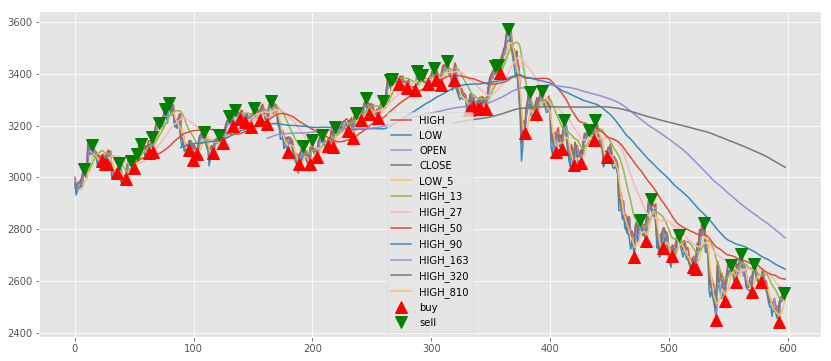

布林带 2537.8818181818165 2633.0835914475015 2451.5118221868543


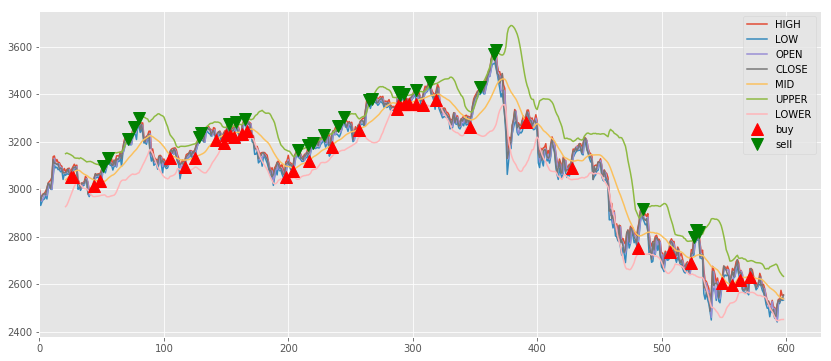

成交市值关系+KDJ显示图及买卖 38179829223900.0 37859570517600.0 6863144076008.947 38.21031372699944 35.4095744922954 43.811792196407524


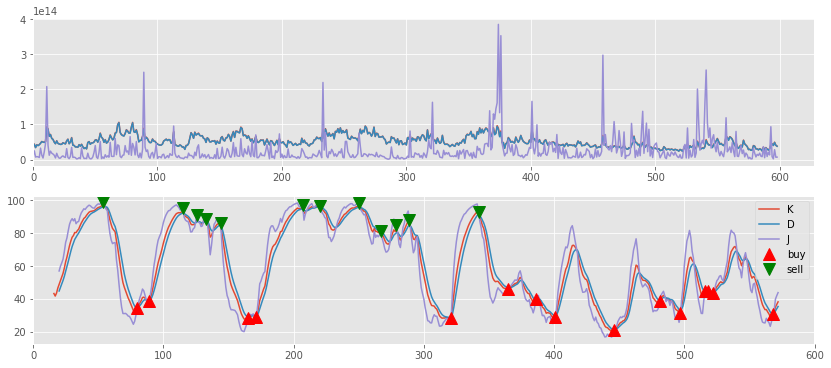

成交量+DMA指标+买卖 -78.43320000000176 -84.42708000000144


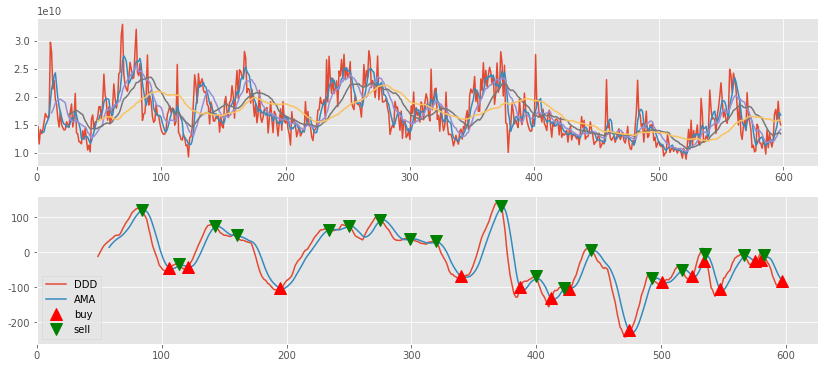

BOLL 2553.841759259263 2665.5970661577276 2451.3348909316933


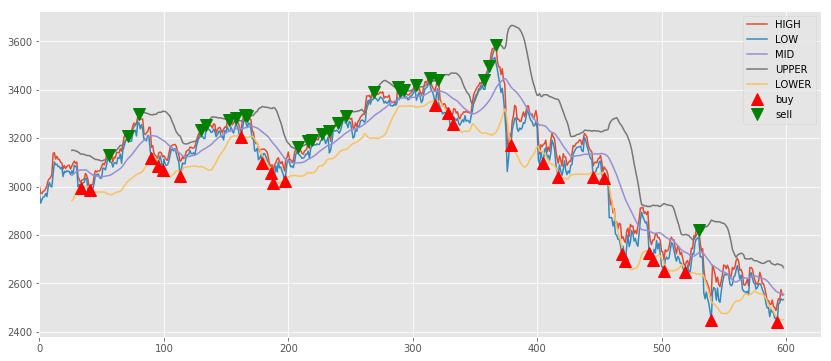

带量BOLL 5849564.934887016 5899047.115293523 5884668.543639621 5851763.821397666 5232942.612382729 6867612.264600877 3631414.3487374745


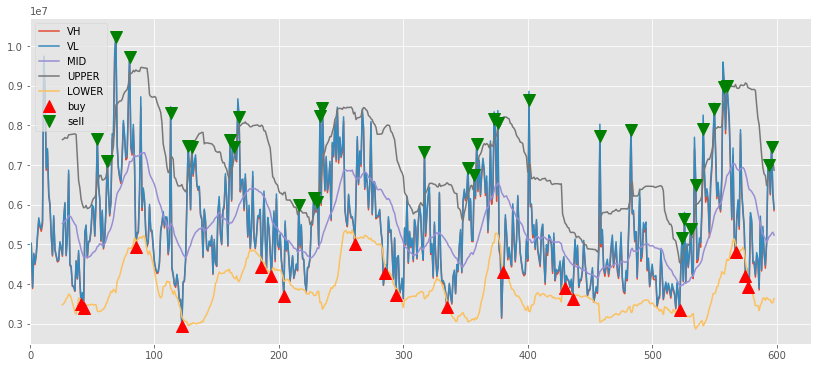

成交量均线+VC 26.889258176430598 112.65076260104499 59.080804354004954


IndexError: index 582 is out of bounds for axis 1 with size 573

In [8]:
#Rqalpha 数据连接测试作图
print ("《开始时间：==》",("%s" % datetime.datetime.now().isoformat() )) 
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)
#扩展MOD
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
#读取/设定数据库时间区域，当前股票，选股时间段。 
x1="000001.XSHG"#XSHG指数，XSHE股票
print ("设定股票代码",x1)
#设定数据库连接：RQALPHA/TUSHARE
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "RQ"#热情啊老婆哈为本地数据，如果修改tushare改tushare在线数据连接
if backend == "RQ":
    set_data_backend(RQAlphaDataBackend())
elif backend == "TU":
    set_data_backend(TushareDataBackend())
set_start_date(run_start_date)
#当前股票最新数据显示test。
S(x1)  # 设置当前关注股票
T(run_end_date)   # 设置当前观察日期
#测试数据库
print ("打印 开盘 最高 最低 收盘 成交量",OPEN, HIGH, LOW, CLOSE, VOL)  # 打印 Open High Low Close
print ("当天涨幅",CLOSE / CLOSE[1] - 1)  # 当天涨幅
print ("打印60日均线",MA(CLOSE, 60))  # 打印60日均线
print ("判断收盘价是否大于60日均线",CLOSE > MA(CLOSE, 60))  # 判断收盘价是否大于60日均线
print ("30日最高价",HHV(HIGH, 30))  # 30日最高价
print ("最近30日，收盘价 Close 大于60日均线的天数",COUNT(CLOSE > MA(CLOSE, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("10日均线上穿",CROSS(MA(CLOSE, 10), MA(CLOSE, 20)))  # 10日均线上穿
print ("最近10天收阳线的天数",COUNT(CLOSE > O, 10))  # 最近10天收阳线的天数
print ("最近60天K线实体的最高价",HHV(MAX(OPEN, CLOSE), 60))  # 最近60天K线实体的最高价
print ("5日均线上穿10日均线",CROSS(MA(CLOSE, 5), MA(CLOSE, 10)))  # 5日均线上穿10日均线
#均线作图
print("均线",OPEN,CLOSE,HIGH,LOW,VOL)
ax = plt.subplot()
buy_signal = CROSS(LOW, MA(LOW,7)) and CROSS(HIGH, MA(LOW,10))
sell_signal = CROSS(MA(HIGH,3),HIGH) or CROSS(MA(HIGH,7),LOW) 
ax.plot(HIGH.series, label="HIGH")
ax.plot(LOW.series, label="LOW")
ax.plot(OPEN.series, label="OPEN")
ax.plot(CLOSE.series, label="CLOSE")
ax.plot(MA(LOW,5).series, label="LOW_5")
ax.plot(MA(HIGH,13).series, label="HIGH_13")
ax.plot(MA(HIGH,27).series, label="HIGH_27")
ax.plot(MA(HIGH,50).series, label="HIGH_50")
ax.plot(MA(HIGH,90).series, label="HIGH_90")
ax.plot(MA(HIGH,163).series, label="HIGH_163")
ax.plot(MA(HIGH,320).series, label="HIGH_320")
ax.plot(MA(HIGH,810).series, label="HIGH_810")
plt.plot(np.where(buy_signal.series)[0], LOW.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], HIGH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")                    
plt.legend(loc="best")
plt.show()
#N=20,P=2 BOLL 布林带作图
MID = MA((HIGH+LOW)/2, 22)
UPPER = MID + STD(LOW, 22) * 2
LOWER = MID - STD(HIGH, 22) * 2
print("布林带",MID,UPPER,LOWER)
ax = plt.subplot()
buy_signal = CROSS(LOW, LOWER) or CROSS(LOW,MID)
sell_signal = CROSS(UPPER,HIGH)
ax.plot(HIGH.series, label="HIGH")
ax.plot(LOW.series, label="LOW")
ax.plot(OPEN.series, label="OPEN")
ax.plot(CLOSE.series, label="CLOSE")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], LOW.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], HIGH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#当前股票价格均线+KDJ显示图及买卖作图
RSV = (HHV(HIGH,1)-LLV(LOW,27))/(HHV(HIGH,27)-LLV(LOW,27))*100
K = EMA(RSV, (9 * 2 - 1))
D = EMA(K, (3 * 2 - 1))
J = K * 3 - D * 2
HV=HIGH*VOL
LV=LOW*VOL
HLV=(HV-LV)*(HIGH-LOW)
print("成交市值关系+KDJ显示图及买卖",HV,LV,HLV,K, D, J)
f1, (ax1, ax2,) = plt.subplots(2, 1)
ax1.plot(HV.series, label="HV")
ax1.plot(LV.series, label="LV")
ax1.plot(HLV.series, label="HLV")
ax1.set_xlim(0)
ax2.plot(K.series, label="K")
ax2.plot(D.series, label="D")
ax2.plot(J.series, label="J")
ax2.set_xlim(0)
buy_signal = (CROSS(IF(D<50,J,D),D) and CROSS(IF(D<50,K,J),D)) #CROSS(J, K)
sell_signal = (CROSS(D,IF(D>70,J,D)) and CROSS(D,IF(D>80,K,J))) #CROSS(K, J)
plt.plot(np.where(buy_signal.series)[0], K.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], J.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#当前股票成交量均线+DMA指标+买卖作图
DDD = MA(CLOSE, 10) - MA(CLOSE, 50)
AMA = MA(DDD, 10)#又叫平行线差指标，是目前股市分析技术指标中的一种中短期指标，它常用于大盘指数和个股的研判。
print("成交量+DMA指标+买卖",DDD, AMA)
f2, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(VOL.series, label="VOL")
ax1.plot(MA(VOL, 5).series, label="ma1")
ax1.plot(MA(VOL, 13).series, label="ma2")
ax1.plot(MA(VOL, 27).series, label="ma3")
ax1.plot(MA(VOL, 50).series, label="ma4")
ax1.set_xlim(0)
ax2.plot(DDD.series, label="DDD")
ax2.plot(AMA.series, label="AMA")
ax2.set_xlim(0)
buy_signal = CROSS(IF(DDD<0,DDD,AMA),AMA) 
sell_signal = CROSS(AMA, DDD)#CROSS(IF(DDD>70,DDD,DDD),DDD) 
plt.plot(np.where(buy_signal.series)[0], AMA.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], DDD.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#N=20,P=2 BOLL 布林带作图
MID = MA((OPEN+HIGH+LOW+CLOSE)/4, 27)
UPPER = MID + STD(LOW, 27) * 2
LOWER = MID - STD(HIGH, 27) * 2
print("BOLL",MID,UPPER,LOWER)
ax = plt.subplot()
buy_signal = CROSS(LOW, LOWER) and CROSS(LOW,MID) 
sell_signal = CROSS(UPPER,HIGH) and CROSS(UPPER,LOW)
ax.plot(HIGH.series, label="HIGH")
ax.plot(LOW.series, label="LOW")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], LOW.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], HIGH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#带量BOLL 布林带作图
VH = (VOL/(HIGH))
VL = (VOL/(LOW))
VO = (VOL/(OPEN))
VC = (VOL/(CLOSE))
MID = (MA(((VOL/(HIGH))+(VOL/(LOW)))/2, 27))
UPPER = ((MA(((VOL/(HIGH))+(VOL/(LOW)))/2, 27)) + STD((VOL/(LOW)), 27) * 1.618)
LOWER = ((MA(((VOL/(HIGH))+(VOL/(LOW)))/2, 27)) - STD((VOL/(HIGH)), 27) * 1.618)
print("带量BOLL",VH,VL,VO,VC,MID,UPPER,LOWER)
ax = plt.subplot()
buy_signal = CROSS((VOL/(LOW)), ((MA(((VOL/(HIGH))+(VOL/(LOW)))/2, 27)) - STD((VOL/(HIGH)), 27) * 1.618)) # and CROSS(VL,MID)
sell_signal = CROSS(UPPER,VH) and CROSS(MID,VL)
ax.plot(VH.series, label="VH")
ax.plot(VL.series, label="VL")
#ax.plot(VO.series, label="VO")
#ax.plot(VC.series, label="VC")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], VL.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], VH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#CCI指标 作图，未完成！！！
def AVEDEV(value,N):#方差函数模块
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)    
    return sum_/N
TYP = (HIGH+LOW+CLOSE)/3
CCI = (TYP-MA(TYP,14))/(0.015*AVEDEV(TYP,14))
VCCI = (VOL-MA(VOL,14))/(0.015*AVEDEV(VOL,14))
VC = ((CCI+VCCI)-MA((CCI+VCCI),14))/(0.015*AVEDEV((CCI+VCCI),14))
VV= VC+CCI
print ("成交量均线+VC",VCCI,CCI,VC)
f3, (ax1,ax2) = plt.subplots(1,2)
ax2.plot(HIGH.series, label="HIGH")
ax2.plot(LOW.series, label="LOW")
ax2.plot(OPEN.series, label="OPEN")
ax2.plot(CLOSE.series, label="CLOSE")
ax2.plot(MA(HIGH, 7).series, label="HIGH_7")
ax2.plot(MA(HIGH, 11).series, label="HIGH_11")
ax2.plot(MA(HIGH, 22).series, label="HIGH_22")
ax2.plot(MA(HIGH, 66).series, label="HIGH_66")
ax2.set_xlim(0)
ax1.plot(VC.series, label="VC")
ax1.plot(MA(VC,3).series, label="vc_3")
ax1.plot(MA(VC,4).series, label="vc_4")
ax1.plot(MA(VC,5).series, label="vc_5")
ax1.plot(MA(VC,6).series, label="vc_6")
ax1.plot(CCI.series, label="CCI")
ax1.plot(MA(CCI,3).series, label="cci_3")
ax1.plot(MA(CCI,4).series, label="cci_4")
ax1.plot(MA(CCI,5).series, label="cci_5")
ax1.plot(MA(CCI,6).series, label="cci_6")
ax1.set_xlim(0)
N1=101
N2=-101
N3=101
buy_signal = CROSS(CCI or VC,N1 or N2)
sell_signal = CROSS(CCI+VC,N1+N2)
plt.plot(np.where(buy_signal.series)[0], VC.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], CCI.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
print ("《结束时间：==》",("%s" % datetime.datetime.now().isoformat() )) 

《开始时间：==》 2018-12-27T09:51:40.736098


QUANTAXIS>> Expand macros in /Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/macropy/core/hquotes.py
QUANTAXIS>> Finding macros in 'macropy.core.hquotes'
QUANTAXIS>> Importing macros from 'macropy.core.quotes' into 'macropy.core.hquotes'
QUANTAXIS>> Expand macros in /Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/macropy/core/quotes.py
QUANTAXIS>> Finding macros in 'macropy.core.quotes'
QUANTAXIS>> Expand macros in /Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/macropy/core/failure.py
QUANTAXIS>> Finding macros in 'macropy.core.failure'
QUANTAXIS>> Importing macros from 'macropy.core.hquotes' into 'macropy.core.failure'


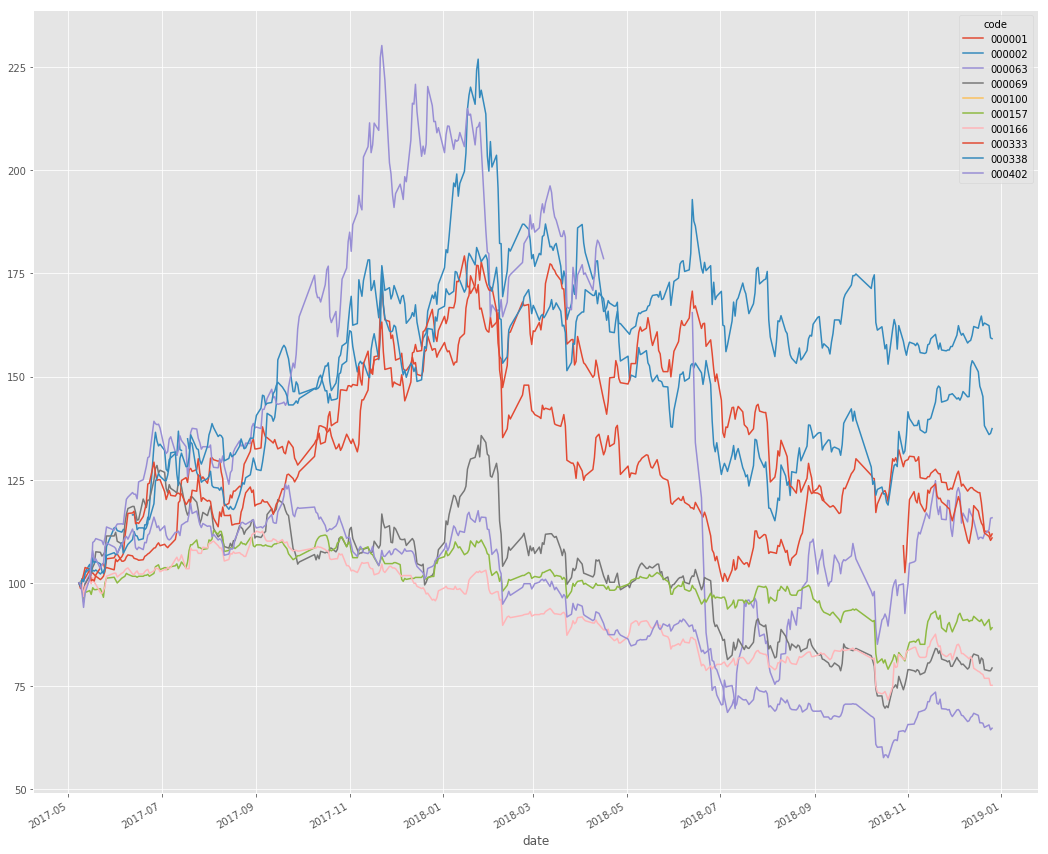

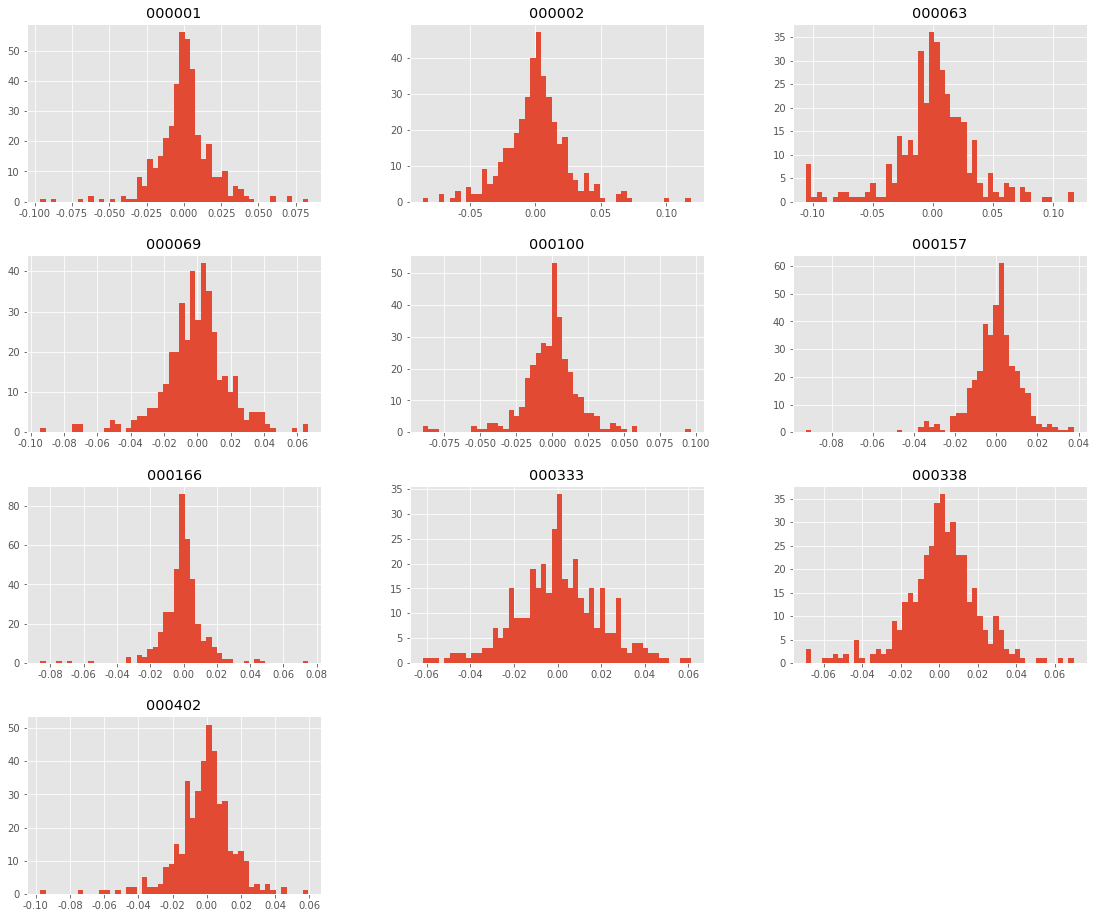

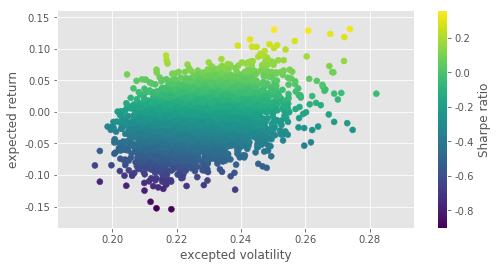

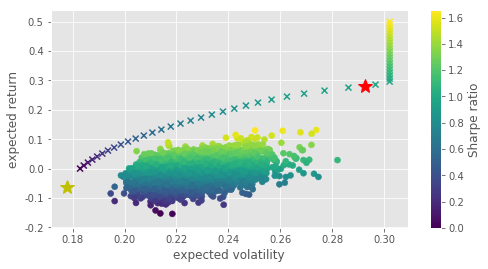

《结束时间：==》 2018-12-27T09:54:51.686674


In [8]:
#QUANTAXIS 测试马科维茨有效前沿实现，先跑了，不明白以后理解再说。
print ("《开始时间：==》",("%s" % datetime.datetime.now().isoformat() )) 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib.pyplot as plt
import QUANTAXIS as QA
# 获取沪深300中的前十根票
code=QA.QA_fetch_stock_block_adv().get_block('沪深300').code[0:10]
data=QA.QA_fetch_stock_day_adv(code,run_start_date,run_end_date).to_qfq() #见前面设定。
# 选择close序列, 进行pivot成表
close=data.pivot('low')#使用最低价
close.head()
(close/close.iloc[0]*100).plot(figsize = (18,16))
log_returns=np.log(close/close.shift(1))
log_returns.head()
log_returns.hist(bins = 50, figsize = (19,16))
log_returns.cov()*252
noa=len(code)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights
np.sum(log_returns.mean()*weights)*252
np.dot(weights.T, np.dot(log_returns.cov()*252,weights))
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()* 252,weights)))
port_returns = []
port_variance = []
for p in range(4000):
    weights = np.random.random(noa)
    weights /=np.sum(weights)
    port_returns.append(np.sum(log_returns.mean()*252*weights))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights))))
port_returns = np.array(port_returns)
port_variance = np.array(port_variance)
#无风险利率设定为4%
risk_free = 0.04
plt.figure(figsize = (8,4))
plt.scatter(port_variance, port_returns, c=(port_returns-risk_free)/port_variance, marker = 'o')
plt.grid(True)
plt.xlabel('excepted volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.show()
def statistics(weights):
    weights = np.array(weights)
    port_returns = np.sum(log_returns.mean()*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252,weights)))
    return np.array([port_returns, port_variance, port_returns/port_variance])
#最优化投资组合的推导是一个约束最优化问题
import scipy.optimize as sco
#最小化夏普指数的负值
def min_sharpe(weights):
    return -statistics(weights)[2]
#约束是所有参数(权重)的总和为1。这可以用minimize函数的约定表达如下
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})
#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数
bnds = tuple((0,1) for x in range(noa))
#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。
opts = sco.minimize(min_sharpe, noa*[1./noa,], method = 'SLSQP', bounds = bnds, constraints = cons)
opts
opts['x'].round(3)
#预期收益率、预期波动率、最优夏普指数
statistics(opts['x']).round(3)
#但是我们定义一个函数对 方差进行最小化
def min_variance(weights):
    return statistics(weights)[1]
optv = sco.minimize(min_variance, noa*[1./noa,],method = 'SLSQP', bounds = bnds, constraints = cons)
optv
optv['x'].round(3)
#得到的预期收益率、波动率和夏普指数
statistics(optv['x']).round(3)
def  min_variancemin_varia (weights):
    return statistics(weights)[1]
#在不同目标收益率水平（target_returns）循环时，最小化的一个约束条件会变化。
target_returns = np.linspace(0.0,0.5,50)
target_variance = []
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    res = sco.minimize(min_variance, noa*[1./noa,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])
target_variance = np.array(target_variance)
plt.figure(figsize = (8,4))
#圆圈：蒙特卡洛随机产生的组合分布
plt.scatter(port_variance, port_returns, c = port_returns/port_variance,marker = 'o')
#叉号：有效前沿
plt.scatter(target_variance,target_returns, c = target_returns/target_variance, marker = 'x')
#红星：标记最高sharpe组合
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)
#黄星：标记最小方差组合
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')
plt.show()
print ("《结束时间：==》",("%s" % datetime.datetime.now().isoformat() )) 

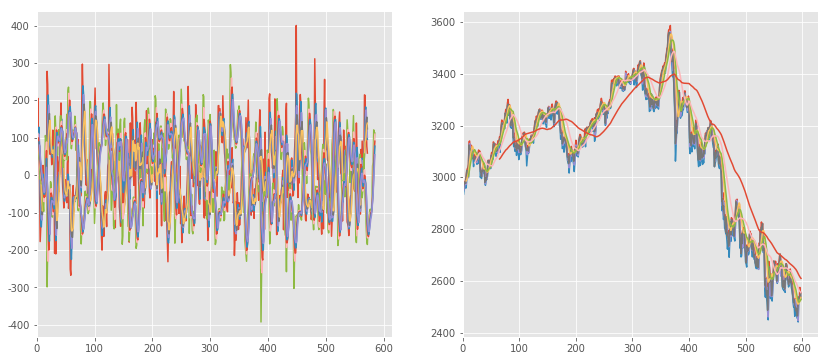

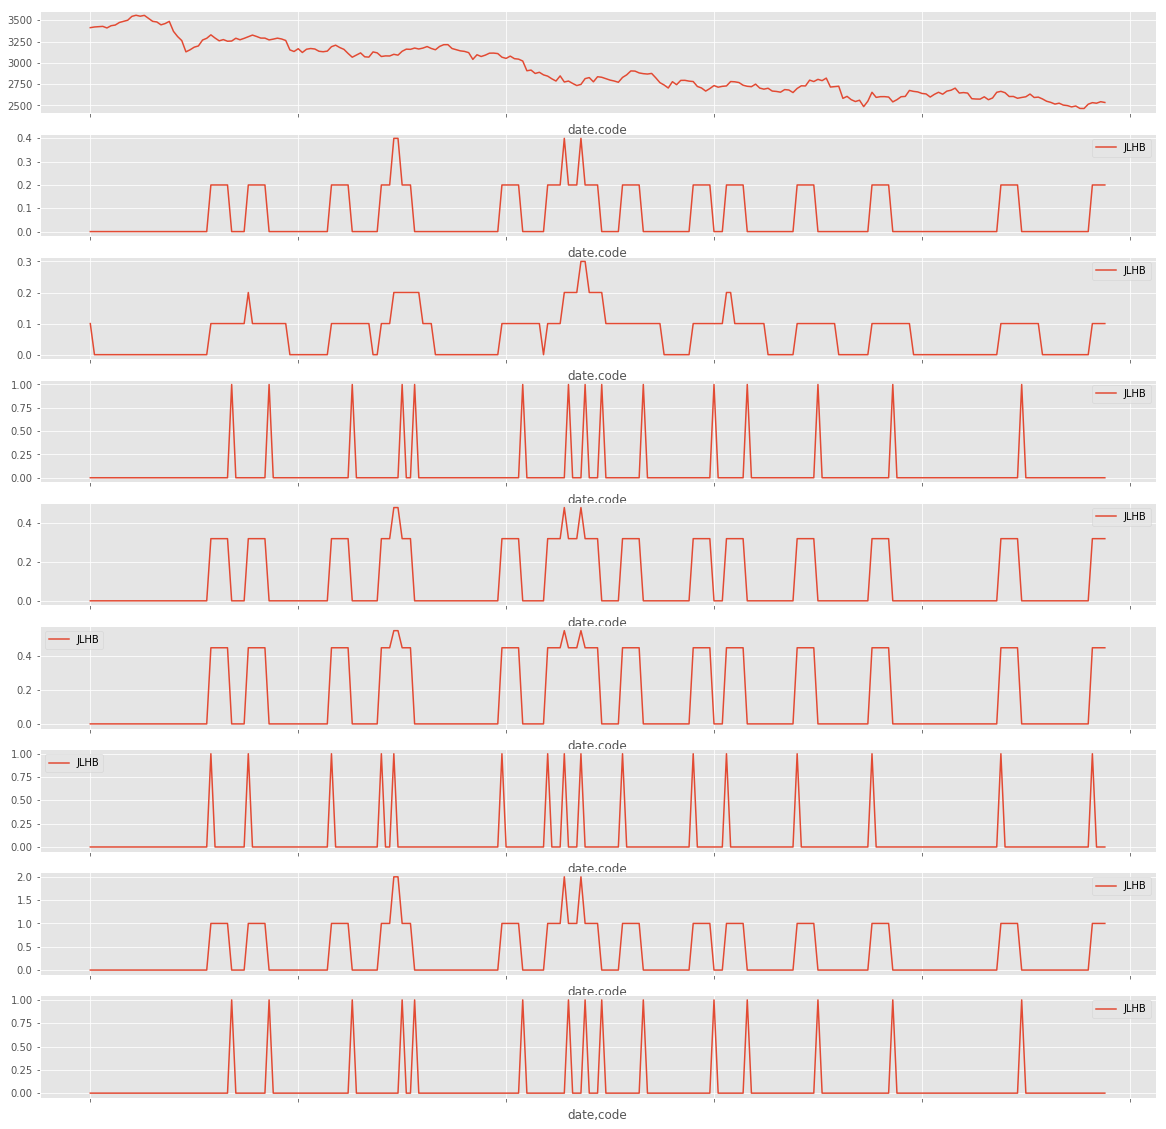

In [9]:
#同一指标在多周期上画图，分钟/日 切换
import QUANTAXIS as QA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from talib import *
'''    ----#基础类指标 [基本和同花顺/通达信一致]----
QA.MA(Series, N)       #简单移动平均
QA.EMA(Series, N)      #异同移动平均
QA.SMA(Series, N, M=1) #累积平均
QA.DIFF(Series, N=1)   #求导数和差分
QA.HHV(Series, N)      #求最高值
QA.LLV(Series, N)      #求最低值
QA.SUM(Series, N)      #求和
QA.ABS(Series)         #绝对值
QA.MAX(A, B)           #求最大
QA.MIN(A, B)           #求最小
QA.CROSS(A, B)         #交叉上穿
QA.COUNT(COND, N)      #取值设为常数
QA.IF(COND, V1, V2)    #逻辑判断
QA.REF(Series, N)      #向前引用
QA.STD(Series, N)      #估算标准差
QA.AVEDEV(Series, N)   #平均绝对方差
QA.BBIBOLL(Series, N1, N2, N3, N4, N, M) #多空布林线
---应用级指标 add_func(func)----
QA.QA_indicator_OSC(DataFrame, N, M)
QA.QA_indicator_BBI(DataFrame, N1, N2, N3, N4)
QA.QA_indicator_PBX(DataFrame, N1, N2, N3, N4, N5, N6)
QA.QA_indicator_BOLL(DataFrame, N)
QA.QA_indicator_ROC(DataFrame, N, M)
QA.QA_indicator_MTM(DataFrame, N, M)
QA.QA_indicator_KDJ(DataFrame, N=9, M1=3, M2=3)
QA.QA_indicator_MFI(DataFrame, N)
QA.QA_indicator_ATR(DataFrame, N)
QA.QA_indicator_SKDJ(DataFrame, N, M)
QA.QA_indicator_WR(DataFrame, N, N1)
QA.QA_indicator_BIAS(DataFrame, N1, N2, N3)
QA.QA_indicator_RSI(DataFrame, N1, N2, N3)
QA.QA_indicator_ADTM(DataFrame, N, M)
QA.QA_indicator_DDI(DataFrame, N, N1, M, M1)
QA.QA_indicator_CCI(DataFrame, N=14)         '''
shijian = '1day' #时间：使用 1min/1day 切换分时和日线
start_data = '2015-01-01' #开始——数据：设定数据起始缓冲解决不同轴问题
if shijian == '1min': #依据shijian条件切换分时
    start = '2018-08-01 09:31:00' #min画图开始时间
    end = '2018-12-19 09:31:00' #min画图结束时间
elif shijian == '1day': #条件切换日线
    start = '2018-01-09' #day画图开始时间
    end = '2019-01-10 ' #day画图结束时间
def QA_indicator_JLHB(dataframe, m=7, n=5):
    #通达信定义 VAR1:=(CLOSE-LLV(LOW,60))/(HHV(HIGH,60)-LLV(LOW,60))*80; B:SMA(VAR1,N,1); VAR2:SMA(B,M,1); 绝路航标:IF(CROSS(B,VAR2) AND B<40,50,0); 
    var1 = (dataframe['close'] - QA.LLV(dataframe['low'], 60)) / \
        (QA.HHV(dataframe['high'], 60) - QA.LLV(dataframe['low'], 60)) * 80
    B = QA.SMA(var1, m)
    var2 = QA.SMA(B, n)
    return pd.DataFrame({'JLHB':QA.CROSS(B,var2)*(B<40)})
def QA_indicator_MACD_JCSC(dataframe, SHORT=12, LONG=26, M=9):
    # 1.DIF向上突破DEA，买入信号参考。 2.DIF向下跌破DEA，卖出信号参考。 
    CLOSE = dataframe.close
    DIFF = QA.EMA(CLOSE, SHORT) - QA.EMA(CLOSE, LONG)
    DEA = QA.EMA(DIFF, M)
    MACD = 2*(DIFF-DEA)
    CROSS_JC = QA.CROSS(DIFF, DEA)
    CROSS_SC = QA.CROSS(DEA, DIFF)
    ZERO = 0
    return pd.DataFrame({'DIFF': DIFF, 'DEA': DEA, 'MACD': MACD, 'CROSS_JC': CROSS_JC, 'CROSS_SC': CROSS_SC, 'ZERO': ZERO})
zhibiao = QA_indicator_JLHB #QA.QA_indicator_KDJ(DataFrame, N=9, M1=3, M2=3) #指标：修改后位名称，设定指标 KDJ/MACD/CCI/BOLL。。。
daima = '000001' #代码：如果设定 index为指数，stock 为股票
tu = 910 #前面数字9代表总计9个图表，中间数字竖列，后一位代表图数列
if shijian == '1min': #分钟条件设定作图转换
    data = QA.QA_fetch_stock_min_adv(daima,start_data,end,shijian) #设定指数imdex/股票stock
    res = data.add_func(zhibiao) #data.add_func(QA_indicator_MA,5) 基础指标计算格式
    res1 = QA.MA(res,1000) #1000周期 
    res2 = QA.MA(res,2000) 
    res3 = QA.REF(res,1000)
    res4 = QA.AVEDEV(res,1000)
    res5 = QA.STD(res,1000)
    res6 = QA.ABS(res)
    res7 = QA.SUM(res,1000)
    res8 = QA.REF(res,1000)
elif shijian == '1day': #日线条件转换作图转换
    data = QA.QA_fetch_index_day_adv(daima,start_data,end,shijian) #设定指数imdex/股票stock
    res = data.add_func(zhibiao)
    res1 = QA.MA(res,5) #5周期计算
    res2 = QA.MA(res,10) #10周期计算
    res3 = QA.REF(res,5)
    res4 = QA.AVEDEV(res,5)
    res5 = QA.STD(res,5)
    res6 = QA.ABS(res)
    res7 = QA.SUM(res,5)
    res8 = QA.REF(res,5)
fig=plt.figure(figsize=(20,20)) #图表长宽量 16，16
plt.style.use('ggplot') #不明白 参考：https://matplotlib.org/gallery/style_sheets/ggplot.html
plt.subplot(tu+1) #绘图：tu+N数列标记，图表0轴显示，后面依次累计
data.select_time(start,end).data.close.plot(use_index=True) #True/False
ax1=plt.subplot(tu+2)
res1.loc[slice(start,end)].plot(use_index=True,ax=ax1)
ax2=plt.subplot(tu+3)
res2.loc[slice(start,end)].plot(use_index=True,ax=ax2)
ax3=plt.subplot(tu+4)
res3.loc[slice(start,end)].plot(use_index=True,ax=ax3)
ax4=plt.subplot(tu+5)
res4.loc[slice(start,end)].plot(use_index=True,ax=ax4)
ax5=plt.subplot(tu+6)
res5.loc[slice(start,end)].plot(use_index=True,ax=ax5)
ax6=plt.subplot(tu+7)
res6.loc[slice(start,end)].plot(use_index=True,ax=ax6)
ax7=plt.subplot(tu+8)
res7.loc[slice(start,end)].plot(use_index=True,ax=ax7)
ax8=plt.subplot(tu+9)
res8.loc[slice(start,end)].plot(use_index=True,ax=ax8)
plt.show()

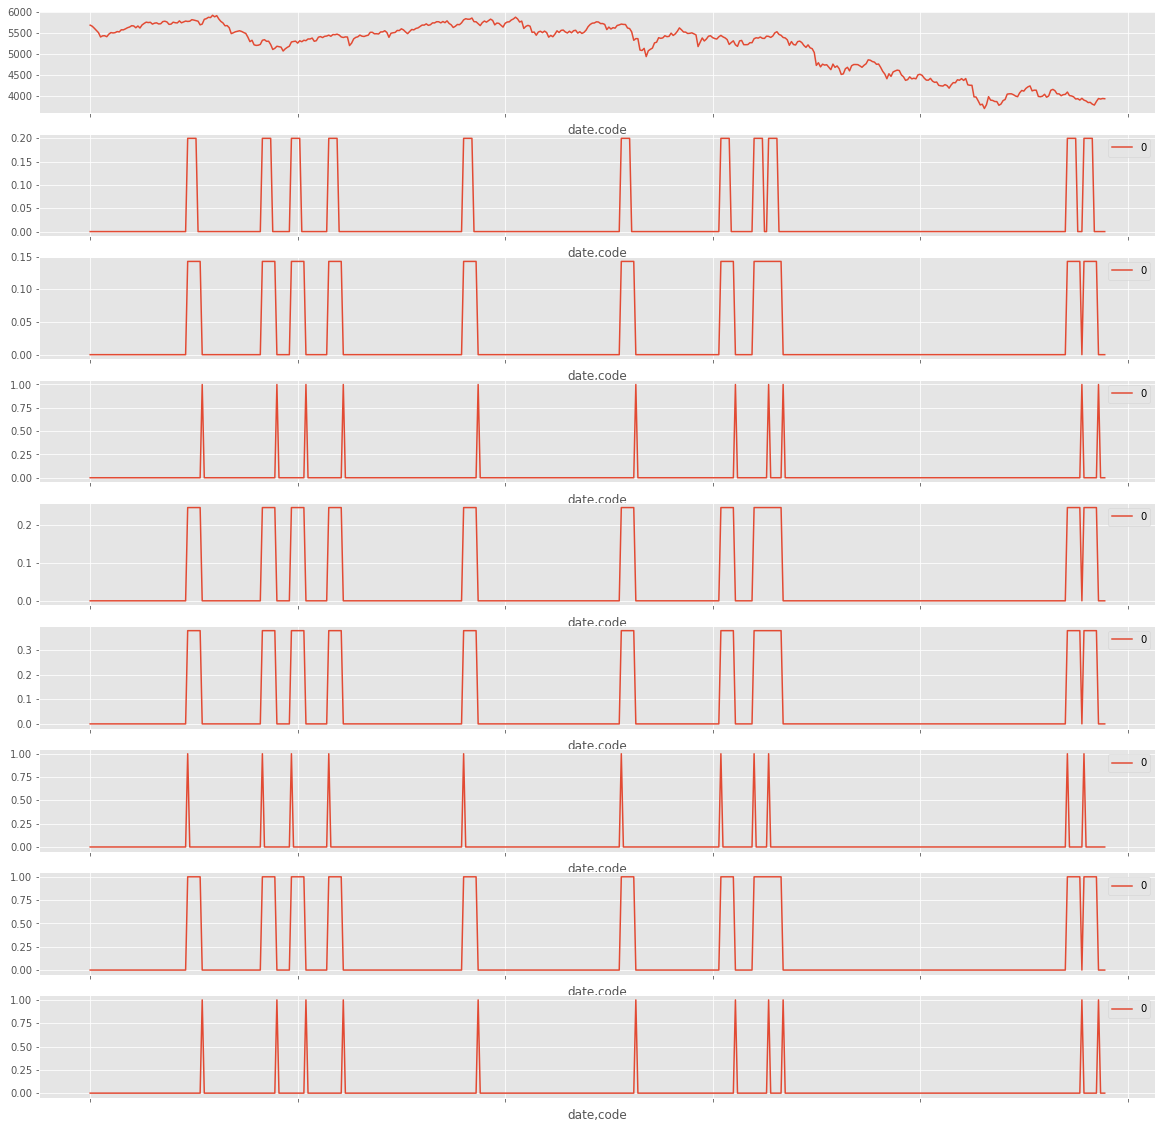

In [10]:
#编写 同花顺 TDX 通用指标 验证选股信号质量使用。
import time
import datetime
import QUANTAXIS as QA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from talib import *

tu = 910 #前面数字9代表总计9个图表，中间数字竖列，后一位代表图数列
qiehuan = 'zs'     #切换 zs：指数基金 ；gp：股票 ； bk ：板块
daima = ['000009'] #代码：如果设定 index为指数，stock 为股票
shijian = '1day' #时间：使用 1min/1day 切换分时和日线

if shijian == '1min':
    start_data = '2018-07-30 09:31:00' #开始——数据：设定数据起始缓冲解决不同轴问题
elif shijian == '1day':
    start_data = '2015-01-01'

if shijian == '1min': #依据shijian条件切换分时
    start = '2018-09-03 09:31:00' #min画图开始时间
    end = '2018-12-21 15:00:00' #min画图结束时间
elif shijian == '1day': #条件切换日线
    start = '2017-01-09' #day画图开始时间
    end = '2019-01-10 ' #day画图结束时间
    
if qiehuan == 'gp': #切换指数数据
    adv = QA.QA_fetch_stock_day_adv
elif qiehuan == 'zs': #切换股票数据 
    adv = QA.QA_fetch_index_day_adv
elif qiehuan == 'bk': #切换板块
    adv = QA.QA_fetch_stock_block_adv
    
def QA_indicator_TEST(dataframe): #指标通用通达信/同花顺/测试模块
    O = OPEN = dataframe.open #开盘价
    C = CLOSE = dataframe.close #收盘价
    H = HIGH = dataframe.high #最高价
    L = LOW = dataframe.low #最低价
    V = VOL = dataframe.volume #成交量
    A = AMOUNT = dataframe.amount #成交额
    #CODE = dataframe.code #股票代码
    #DATE = dataframe.date #股票日期
    MA = QA.MA#(Series, N)       #简单移动平均
    EMA = QA.EMA#(Series, N)      #异同移动平均
    SMA = QA.SMA#(Series, N, M=1) #累积平均
    DIFF = QA.DIFF#(Series, N=1)   #求导数和差分
    HHV = QA.HHV#(Series, N)      #求最高值
    LLV = QA.LLV#(Series, N)      #求最低值
    SUM = QA.SUM#(Series, N)      #求和
    ABS = QA.ABS#(Series)         #绝对值
    MAX = QA.MAX#(A, B)           #求最大
    MIN = QA.MIN#(A, B)           #求最小
    CROSS = QA.CROSS#(A, B)         #交叉上穿
    COUNT = QA.COUNT#(COND, N)      #取值设为常数    
    IF = QA.IF#(COND, V1, V2)    #逻辑判断
    #AND = QA.AND#(COND,V1,V2)   #逻辑判断 和
    #OR = QA.OR#(COND, V1,V2)    #逻辑判断 或
    REF = QA.REF#(Series, N)      #向前引用
    STD = QA.STD#(Series, N)      #估算标准差
    AVEDEV = QA.AVEDEV #(Series, N)   #平均绝对方差
    BBIBOLL = QA.BBIBOLL #(Series, N1, N2, N3, N4, N, M) #多空布林线
    #测试条件计算公式
    #成交量MACD
    vmacd = CROSS((2*((MA(V,12) - MA(V,26))-(MA((MA(V,12) - MA(V,26)),9)))), (((MA(V,12) - MA(V,26))-(MA((MA(V,12) - MA(V,26)),9)))/3)) #macd
    #成交量MA
    vma = CROSS(V*L, MA(V*L,7)) & CROSS(V*L, MA(V*L,10)) #成交量均线信号
    #成交量BOLL
    vboll = CROSS((V/(L)), ((MA(((V/(H))+(V/(L)))/2, 27)) - STD((V/(H)), 27) * 1.618)) #量BOLL信号
    #成交量KDJ
    vkdj = (CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))<50,((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))*2),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))) | CROSS(IF((EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))<50,(EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1)))*3-(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))*2)),(EMA((EMA(((HHV(L,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100),(9*2-1))),(3*2-1)))))
    #成交量CCI
    #cci = CROSS(((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14))) & ((((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14))))-MA((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))/(0.015*AVEDEV((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14)))),101 & -101)
    
    TEST =  (vkdj | vboll | vmacd) & vma # &:或；|：和；^: 异；~:反相；<<:左移动；>>:右移动
    return pd.DataFrame(TEST)
zhibiao = QA_indicator_TEST #QA.QA_indicator_KDJ(DataFrame, N=9, M1=3, M2=3) #指标：修改后位名称，设定指标 KDJ/MACD/CCI/BOLL。。。

if shijian == '1min': #分钟条件设定作图转换
    data = adv(daima,start_data,end,shijian) #设定指数imdex/股票stock
    res = data.add_func(zhibiao) #data.add_func(QA_indicator_MA,5) 基础指标计算格式
    res1 = QA.MA(res,1000) #1000周期 
    res2 = QA.MA(res,2000) 
    res3 = QA.REF(res,1000)
    res4 = QA.AVEDEV(res,1000)
    res5 = QA.STD(res,1000)
    res6 = QA.ABS(res)
    res7 = QA.SUM(res,1000)
    res8 = QA.REF(res,1000)
elif shijian == '1day': #日线条件转换作图转换
    data = adv(daima,start_data,end,shijian) #设定指数imdex/股票stock
    res = data.add_func(zhibiao)
    res1 = QA.MA(res,5) #5周期计算
    res2 = QA.MA(res,7) #10周期计算
    res3 = QA.REF(res,7)
    res4 = QA.AVEDEV(res,7)
    res5 = QA.STD(res,7)
    res6 = QA.ABS(res)
    res7 = QA.SUM(res,7)
    res8 = QA.REF(res,7)
fig=plt.figure(figsize=(20,20)) #图表长宽量 16，16
plt.style.use('ggplot') #不明白 参考：https://matplotlib.org/gallery/style_sheets/ggplot.html
plt.subplot(tu+1) #绘图：tu+N数列标记，图表0轴显示，后面依次累计
data.select_time(start,end).data.close.plot(use_index=True) #True/False
ax1=plt.subplot(tu+2)
res1.loc[slice(start,end)].plot(use_index=True,ax=ax1)
ax2=plt.subplot(tu+3)
res2.loc[slice(start,end)].plot(use_index=True,ax=ax2)
ax3=plt.subplot(tu+4)
res3.loc[slice(start,end)].plot(use_index=True,ax=ax3)
ax4=plt.subplot(tu+5)
res4.loc[slice(start,end)].plot(use_index=True,ax=ax4)
ax5=plt.subplot(tu+6)
res5.loc[slice(start,end)].plot(use_index=True,ax=ax5)
ax6=plt.subplot(tu+7)
res6.loc[slice(start,end)].plot(use_index=True,ax=ax6)
ax7=plt.subplot(tu+8)
res7.loc[slice(start,end)].plot(use_index=True,ax=ax7)
ax8=plt.subplot(tu+9)
res8.loc[slice(start,end)].plot(use_index=True,ax=ax8)
plt.show()



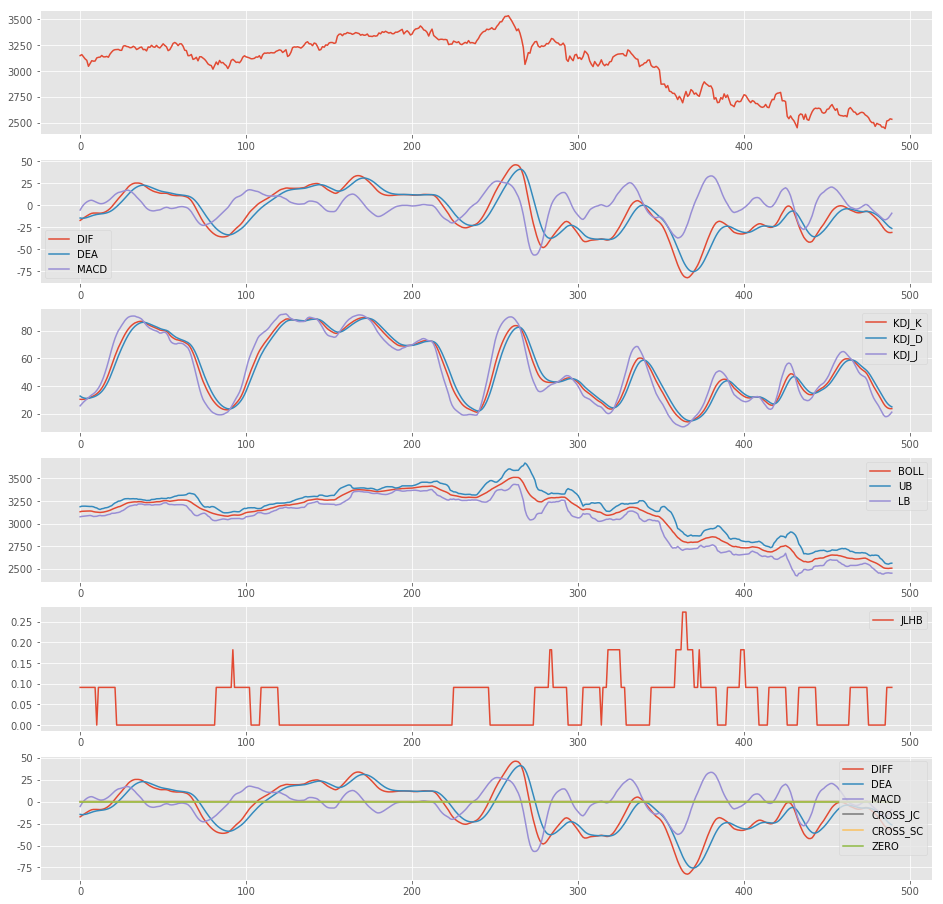

In [11]:
#实例 同一指标在多周期上画图_验证买卖点用
import QUANTAXIS as QA
import pandas as pd
import matplotlib.pyplot as plt
start='2017-01-09' #开始时间
end='2019-01-10 ' #结束时间
zhibiao = QA.QA_indicator_BOLL #设定指标 QA.QA_indicator_WR,1,2
daima = '000001' #指数代码

def QA_indicator_JLHB(dataframe, m=7, n=5):
    #通达信定义 VAR1:=(CLOSE-LLV(LOW,60))/(HHV(HIGH,60)-LLV(LOW,60))*80; B:SMA(VAR1,N,1); 
    #.        VAR2:SMA(B,M,1); 
    #.        绝路航标:IF(CROSS(B,VAR2) AND B<40,50,0); 
    var1 = (dataframe['close'] - QA.LLV(dataframe['low'], 60)) / \
        (QA.HHV(dataframe['high'], 60) - QA.LLV(dataframe['low'], 60)) * 80
    B = QA.SMA(var1, m)
    var2 = QA.SMA(B, n)
    return pd.DataFrame({'JLHB':QA.CROSS(B,var2)*(B<40)})
def QA_indicator_MACD_JCSC(dataframe, SHORT=12, LONG=26, M=9):
    # 1.DIF向上突破DEA，买入信号参考。 2.DIF向下跌破DEA，卖出信号参考。 
    CLOSE = dataframe.close
    DIFF = QA.EMA(CLOSE, SHORT) - QA.EMA(CLOSE, LONG)
    DEA = QA.EMA(DIFF, M)
    MACD = 2*(DIFF-DEA)
    CROSS_JC = QA.CROSS(DIFF, DEA)
    CROSS_SC = QA.CROSS(DEA, DIFF)
    ZERO = 0
    return pd.DataFrame({'DIFF': DIFF, 'DEA': DEA, 'MACD': MACD, 'CROSS_JC': CROSS_JC, 'CROSS_SC': CROSS_SC, 'ZERO': ZERO})


tu = 610 ##6代表6个图，中间1列，后1代表数列
data=QA.QA_fetch_index_day_adv(daima,'2015-01-01',end,'1day') 
res=QA.MA(data.add_func(QA.QA_indicator_MACD),11)
res1=QA.MA(data.add_func(QA.QA_indicator_KDJ,27,9,3),11)
res2=data.add_func(QA.QA_indicator_BOLL,11)
res3=QA.MA(data.add_func(QA_indicator_JLHB),11)
res4=QA.MA(data.add_func(QA_indicator_MACD_JCSC),11)
fig=plt.figure(figsize=(16,16))
plt.style.use('ggplot') #matplotlib ggplot style https://matplotlib.org/gallery/style_sheets/ggplot.html
plt.subplot(tu+1)
data.select_time(start,end).data.low.plot(use_index=False)
ax0=plt.subplot(tu+2)
res.loc[slice(start,end)].plot(use_index=False,ax=ax0)
ax=plt.subplot(tu+3)
res1.loc[slice(start,end)].plot(use_index=False,ax=ax)
ax1=plt.subplot(tu+4)
res2.loc[slice(start,end)].plot(use_index=False,ax=ax1)
ax2=plt.subplot(tu+5)
res3.loc[slice(start,end)].plot(use_index=False,ax=ax2)
ax3=plt.subplot(tu+6)
res4.loc[slice(start,end)].plot(use_index=False,ax=ax3)
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
#终端正常运行，目前stock冲突，等待解决
"""
Module implementing DyMainWindow.
"""
import os
import json
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtCore import pyqtSlot, Qt
from PyQt5.QtWidgets import QMainWindow, QDialog, QAction, QLabel, QCheckBox, QTextEdit, QPushButton, QGridLayout
import matplotlib
matplotlib.use('Qt5Agg')
from DevilYuan import *
# From DevilYuan
from DyCommon.DyCommon import DyCommon
from Stock.Common.DyStockCommon import DyStockCommon
from Stock.Trade.Ui.DyStockTradeMainWindow import DyStockTradeMainWindow
from Stock.Data.Ui.DyStockDataMainWindow import DyStockDataMainWindow
from Stock.BackTesting.Ui.DyStockBackTestingMainWindow import DyStockBackTestingMainWindow
from Stock.Select.Ui.DyStockSelectMainWindow import DyStockSelectMainWindow
from Stock.Config.DyStockConfig import DyStockConfig
from Stock.Config.DyStockHistDaysDataSourceConfigDlg import DyStockHistDaysDataSourceConfigDlg
from Stock.Config.DyStockMongoDbConfigDlg import DyStockMongoDbConfigDlg
from Stock.Config.Trade.DyStockWxScKeyConfigDlg import DyStockWxScKeyConfigDlg
from Stock.Config.Trade.DyStockAccountConfigDlg import DyStockAccountConfigDlg
class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(473, 235)
        self.centralWidget = QtWidgets.QWidget(MainWindow)
        self.centralWidget.setObjectName("centralWidget")
        self.pushButtonSelectStock = QtWidgets.QPushButton(self.centralWidget)
        self.pushButtonSelectStock.setGeometry(QtCore.QRect(10, 10, 221, 91))
        font = QtGui.QFont()
        font.setFamily("Arial")
        font.setPointSize(20)
        self.pushButtonSelectStock.setFont(font)
        self.pushButtonSelectStock.setObjectName("pushButtonSelectStock")
        self.pushButtonStockTrade = QtWidgets.QPushButton(self.centralWidget)
        self.pushButtonStockTrade.setGeometry(QtCore.QRect(240, 10, 221, 91))
        font = QtGui.QFont()
        font.setFamily("Arial")
        font.setPointSize(20)
        self.pushButtonStockTrade.setFont(font)
        self.pushButtonStockTrade.setObjectName("pushButtonStockTrade")
        self.pushButtonStockData = QtWidgets.QPushButton(self.centralWidget)
        self.pushButtonStockData.setGeometry(QtCore.QRect(240, 110, 221, 91))
        font = QtGui.QFont()
        font.setFamily("Arial")
        font.setPointSize(20)
        self.pushButtonStockData.setFont(font)
        self.pushButtonStockData.setObjectName("pushButtonStockData")
        self.pushButtonStockStrategyBackTestinig = QtWidgets.QPushButton(self.centralWidget)
        self.pushButtonStockStrategyBackTestinig.setGeometry(QtCore.QRect(10, 110, 221, 91))
        font = QtGui.QFont()
        font.setFamily("Arial")
        font.setPointSize(20)
        self.pushButtonStockStrategyBackTestinig.setFont(font)
        self.pushButtonStockStrategyBackTestinig.setObjectName("pushButtonStockStrategyBackTestinig")
        MainWindow.setCentralWidget(self.centralWidget)
        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)
    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "魔元量化"))
        self.pushButtonSelectStock.setText(_translate("MainWindow", "选股"))
        self.pushButtonStockTrade.setText(_translate("MainWindow", "股票交易"))
        self.pushButtonStockData.setText(_translate("MainWindow", "股票数据"))
        self.pushButtonStockStrategyBackTestinig.setText(_translate("MainWindow", "股票策略回测"))
class DyMainWindow(QMainWindow, Ui_MainWindow):
    """
    Class documentation goes here.
    """
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    def __init__(self, parent=None):
        """
        Constructor
        @param parent reference to the parent widget
        @type QWidget
        """
        super(DyMainWindow, self).__init__(parent)
        self.setupUi(self)
        self.setWindowFlags(Qt.WindowMinimizeButtonHint|Qt.WindowCloseButtonHint)
        self.setFixedSize(self.width(), self.height())
        # menu
        self._initMenu()
        # config
        self._config()
    @pyqtSlot()
    def on_pushButtonSelectStock_clicked(self):
        """
        Slot documentation goes here.
        """
        # TODO: not implemented yet
        DyStockSelectMainWindow(self).show()
    @pyqtSlot()
    def on_pushButtonStockTrade_clicked(self):
        """
        Slot documentation goes here.
        """
        # TODO: not implemented yet
        DyStockTradeMainWindow(self).show()
    @pyqtSlot()
    def on_pushButtonStockData_clicked(self):
        """
        Slot documentation goes here.
        """
        # TODO: not implemented yet
        DyStockDataMainWindow(self).show()
    @pyqtSlot()
    def on_pushButtonStockStrategyBackTestinig_clicked(self):
        """
        Slot documentation goes here.
        """
        # TODO: not implemented yet
        DyStockBackTestingMainWindow(self).show()
    def _initMenu(self):
        # 创建菜单
        menuBar = self.menuBar()
        # 添加菜单
        menu = menuBar.addMenu('配置')
        action = QAction('股票历史日线数据源...', self)
        action.triggered.connect(self._configStockHistDaysDataSource)
        menu.addAction(action)
        action = QAction('MongoDB...', self)
        action.triggered.connect(self._configMongoDb)
        menu.addAction(action)
        subMenu = menu.addMenu('实盘交易')
        action = QAction('微信...', self)
        action.triggered.connect(self._configWx)
        subMenu.addAction(action)
        action = QAction('账号...', self)
        action.triggered.connect(self._configAccount)
        subMenu.addAction(action)
    def _configStockHistDaysDataSource(self):
        DyStockHistDaysDataSourceConfigDlg().exec_()
    def _configMongoDb(self):
        DyStockMongoDbConfigDlg().exec_()
    def _configWx(self):
        DyStockWxScKeyConfigDlg().exec_()
    def _configAccount(self):
        DyStockAccountConfigDlg().exec_()
    def _config(self):
        DyCommon.exePath = os.path.dirname(os.path.abspath(__file__))
        DyStockConfig.config()
if __name__ == "__main__":
    """
    import ctypes
    whnd = ctypes.windll.kernel32.GetConsoleWindow()
    if whnd != 0:
        ctypes.windll.user32.ShowWindow(whnd, 0)
        ctypes.windll.kernel32.CloseHandle(whnd)
    """
    import ctypes
    import platform
    # 设置Windows底部任务栏图标
    if 'Windows' in platform.uname() :
        ctypes.windll.shell32.SetCurrentProcessExplicitAppUserModelID('DevilYuan')
    import sys
    app = QtWidgets.QApplication(sys.argv)
    app.setWindowIcon(QtGui.QIcon('DevilYuan.jpg'))
    MainWindow = DyMainWindow()
    MainWindow.show()
    import qdarkstyle
    app.setStyleSheet(qdarkstyle.load_stylesheet_pyqt5())
    sys.exit(app.exec_())

In [ ]:
import hikyuu #hikyuu环境测试

In [ ]:
import zipline

In [9]:
#测试模块多环境整合！！！
from kivy.app import App #kivy跨平台编译环境
import kivy 
print ("kivy",kivy.__version__)
import matplotlib 
print ("matplotlib",matplotlib.__version__)
import numpy 
print ("numpy",numpy.__version__)
import talib 
print ("talib",talib.__version__)
import funcat  #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
print("funcat",funcat.__version__)
import tushare  #TUSHARE数据连接更新。
print ("tushare",tushare.__version__)
import rqalpha #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
print("rqalpha",rqalpha.__version__)
import abupy #abupy环境测试
print("abupy",abupy.__version__)
import pymongo
print("pymongo",pymongo.__version__)
import tensorflow
print("tensorflow",tensorflow.__version__)

[DEBUG  ] Loader for ConfigParser was unable to find the sources
[INFO   ] [Logger      ] Record log in /Users/zy/.kivy/logs/kivy_18-12-27_0.txt
QUANTAXIS>> [Logger      ] Record log in /Users/zy/.kivy/logs/kivy_18-12-27_0.txt
[INFO   ] [Kivy        ] v1.10.1
QUANTAXIS>> [Kivy        ] v1.10.1
[INFO   ] [Python      ] v3.6.5 (default, Jun 21 2018, 07:41:06) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
QUANTAXIS>> [Python      ] v3.6.5 (default, Jun 21 2018, 07:41:06) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
[INFO   ] [Factory     ] 194 symbols loaded
QUANTAXIS>> [Factory     ] 194 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_imageio, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
QUANTAXIS>> [Image       ] Providers: img_tex, img_imageio, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)


kivy 1.10.1
matplotlib 3.0.2
numpy 1.15.4
talib 0.4.16
funcat 0.3.2
tushare 1.2.17
rqalpha 3.2.0


QUANTAXIS>> Expand macros in /Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/sklearn/utils/_show_versions.py
QUANTAXIS>> Finding macros in 'sklearn.utils._show_versions'
QUANTAXIS>> Expand macros in /Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/scipy/signal/signaltools.py
QUANTAXIS>> Finding macros in 'scipy.signal.signaltools'
QUANTAXIS>> Expand macros in /Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/bokeh/core/templates.py
QUANTAXIS>> Finding macros in 'bokeh.core.templates'
QUANTAXIS>> Expand macros in /Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/bokeh/embed/elements.py
QUANTAXIS>> Finding macros in 'bokeh.embed.elements'
QUANTAXIS>> Expand macros in /Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/bokeh/embed/standalone.py
QUANTAXIS>> Finding macros in 'bokeh.

abupy 0.4.0
pymongo 3.7.2


QUANTAXIS>> Expand macros in /Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/tensorflow/python/framework/load_library.py
QUANTAXIS>> Finding macros in 'tensorflow.python.framework.load_library'


tensorflow 1.5.0
